In [5]:
import glob
import os
import cv2
import torch
import tqdm
import argparse
import matplotlib.pyplot as plt
import numpy as np
from segment_anything import sam_model_registry, SamPredictor
from monai.transforms import LoadImaged, ScaleIntensityRanged, Compose, Identity
from monai.data import DataLoader, Dataset, decollate_batch
from monai.utils import first
from monai.metrics import DiceMetric
from utils import utils
import warnings﻿

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


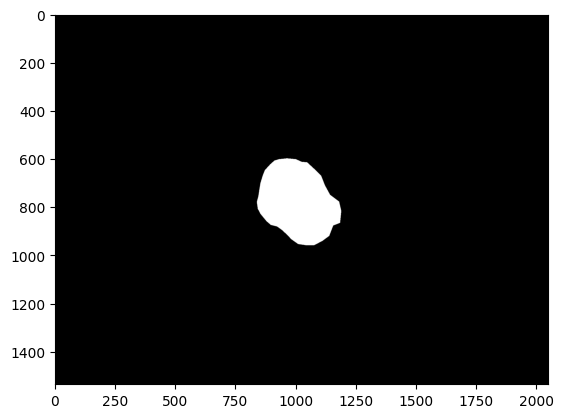

In [29]:
mask='/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png'

#load mask
mask = cv2.imread(mask)
#plot image
plt.imshow(mask)


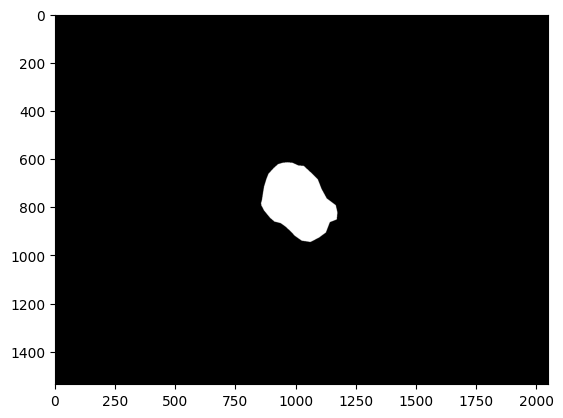

In [30]:
eroded = cv2.erode(mask, np.ones((30,30), np.uint8), iterations=1)

plt.imshow(eroded)

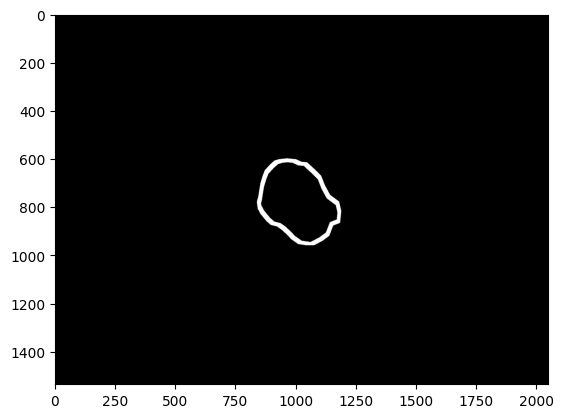

In [31]:
#remove eroded mask from original mask
mask = mask - eroded

plt.imshow(mask)